In [1]:
# Dependancies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
import time 
from datetime import datetime

In [2]:
lats = np.random.uniform(high = -90.000, low = 90.000, size = 1500)
lngt = np.random.uniform(high = -180.000, low = 180.000, size = 1500)

In [3]:
coordinates = zip(lats, lngt)

In [4]:
cities = []

In [5]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

599

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
boston_data = city_weather.json()


In [7]:
boston_data["main"]["temp_max"]

38.07

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 38.07 48 20 8.01


In [9]:
# getting date from json data
date = boston_data["dt"]
# converting to standard time format
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 11, 24, 15, 28, 56)

In [10]:
# more formatting on the date and time
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-24 15:28:56'

In [11]:
city_data = []
print("Beginning Data Retrieval")
print("--------------------------")
# creating counters
record_count = 1
set_count = 1

# loop through all cities in our lists

for i, city in enumerate(cities):
    if (i % 50 ==0 and i >= 50 ):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # create an endpoint url for the cities
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # logging record and set numbers and cities
    print(f"Processing Record {record_count} of {set_count} | {city}")
    # add 1 to record count
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of 1 | chlorakas
Processing Record 2 of 1 | qaqortoq
Processing Record 3 of 1 | vaini
Processing Record 4 of 1 | akyab
Processing Record 5 of 1 | nikolskoye
Processing Record 6 of 1 | saint-philippe
Processing Record 7 of 1 | komsomolskiy
Processing Record 8 of 1 | albany
Processing Record 9 of 1 | havre-saint-pierre
Processing Record 10 of 1 | dikson
Processing Record 11 of 1 | naifaru
Processing Record 12 of 1 | hobart
Processing Record 13 of 1 | new norfolk
Processing Record 14 of 1 | lorengau
Processing Record 15 of 1 | bambous virieux
Processing Record 16 of 1 | waingapu
Processing Record 17 of 1 | kapaa
Processing Record 18 of 1 | metro
Processing Record 19 of 1 | harper
Processing Record 20 of 1 | grand river south east
City not found. Skipping...
Processing Record 21 of 1 | coihaique
Processing Record 22 of 1 | constitucion
Processing Record 23 of 1 | balikpapan
Processing Record 24 of 1 | sentyabrskiy
City

Processing Record 8 of 5 | zolotinka
City not found. Skipping...
Processing Record 9 of 5 | prince rupert
Processing Record 10 of 5 | lasa
Processing Record 11 of 5 | skalistyy
City not found. Skipping...
Processing Record 12 of 5 | aksarka
Processing Record 13 of 5 | swabi
Processing Record 14 of 5 | alpena
Processing Record 15 of 5 | vaitupu
City not found. Skipping...
Processing Record 16 of 5 | carutapera
Processing Record 17 of 5 | podgornoye
Processing Record 18 of 5 | pangoa
Processing Record 19 of 5 | san rafael
Processing Record 20 of 5 | berdigestyakh
Processing Record 21 of 5 | linqiong
Processing Record 22 of 5 | barentsburg
City not found. Skipping...
Processing Record 23 of 5 | chicama
Processing Record 24 of 5 | siva
Processing Record 25 of 5 | krasnyy oktyabr
Processing Record 26 of 5 | bethel
Processing Record 27 of 5 | maua
Processing Record 28 of 5 | mogadishu
Processing Record 29 of 5 | auki
Processing Record 30 of 5 | tabou
Processing Record 31 of 5 | sitka
Process

Processing Record 13 of 9 | idlib
Processing Record 14 of 9 | san quintin
Processing Record 15 of 9 | chunskiy
Processing Record 16 of 9 | cognac
Processing Record 17 of 9 | mogochin
City not found. Skipping...
Processing Record 18 of 9 | seminole
Processing Record 19 of 9 | lamar
Processing Record 20 of 9 | tuggurt
City not found. Skipping...
Processing Record 21 of 9 | sulina
Processing Record 22 of 9 | nuuk
Processing Record 23 of 9 | santa eulalia del rio
City not found. Skipping...
Processing Record 24 of 9 | praia da vitoria
Processing Record 25 of 9 | buqayq
City not found. Skipping...
Processing Record 26 of 9 | chapais
Processing Record 27 of 9 | phan thiet
Processing Record 28 of 9 | puerto cabezas
Processing Record 29 of 9 | alta floresta
Processing Record 30 of 9 | serik
Processing Record 31 of 9 | nouakchott
Processing Record 32 of 9 | northam
Processing Record 33 of 9 | ambulu
Processing Record 34 of 9 | maralal
Processing Record 35 of 9 | nam tha
City not found. Skipping

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chlorakas,34.8042,32.4083,67.23,71,20,5.75,CY,2021-11-24 15:36:19
1,Qaqortoq,60.7167,-46.0333,32.50,97,100,19.10,GL,2021-11-24 15:35:40
2,Vaini,-21.2000,-175.2000,69.96,100,20,0.00,TO,2021-11-24 15:33:19
3,Akyab,20.1500,92.9000,79.02,61,21,5.57,MM,2021-11-24 15:36:20
4,Nikolskoye,59.7035,30.7861,35.49,78,88,10.47,RU,2021-11-24 15:30:44
5,Saint-Philippe,-21.3585,55.7679,80.19,78,79,8.84,RE,2021-11-24 15:33:20
6,Komsomolskiy,40.4272,71.7189,44.02,56,72,4.61,UZ,2021-11-24 15:36:20
7,Albany,42.6001,-73.9662,34.81,58,1,8.10,US,2021-11-24 15:30:06
8,Havre-Saint-Pierre,50.2334,-63.5986,35.60,86,90,14.97,CA,2021-11-24 15:36:21
9,Dikson,73.5069,80.5464,5.92,89,100,8.19,RU,2021-11-24 15:33:08


In [17]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chlorakas,CY,2021-11-24 15:36:19,34.8042,32.4083,67.23,71,20,5.75
1,Qaqortoq,GL,2021-11-24 15:35:40,60.7167,-46.0333,32.50,97,100,19.10
2,Vaini,TO,2021-11-24 15:33:19,-21.2000,-175.2000,69.96,100,20,0.00
3,Akyab,MM,2021-11-24 15:36:20,20.1500,92.9000,79.02,61,21,5.57
4,Nikolskoye,RU,2021-11-24 15:30:44,59.7035,30.7861,35.49,78,88,10.47
5,Saint-Philippe,RE,2021-11-24 15:33:20,-21.3585,55.7679,80.19,78,79,8.84
6,Komsomolskiy,UZ,2021-11-24 15:36:20,40.4272,71.7189,44.02,56,72,4.61
7,Albany,US,2021-11-24 15:30:06,42.6001,-73.9662,34.81,58,1,8.10
8,Havre-Saint-Pierre,CA,2021-11-24 15:36:21,50.2334,-63.5986,35.60,86,90,14.97
9,Dikson,RU,2021-11-24 15:33:08,73.5069,80.5464,5.92,89,100,8.19


In [18]:
# create output file
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

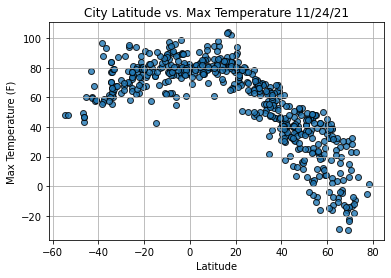

In [20]:
# scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

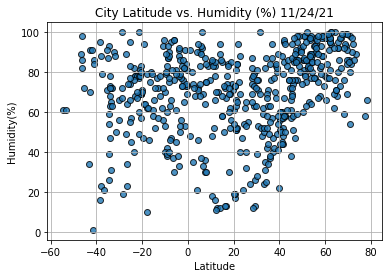

In [28]:
# scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

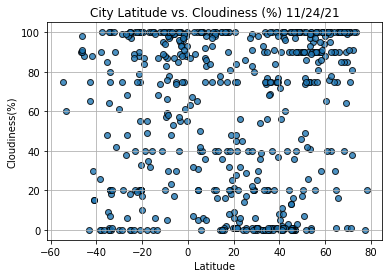

In [29]:
# scatter plot for latitude vs. Cloudiness
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

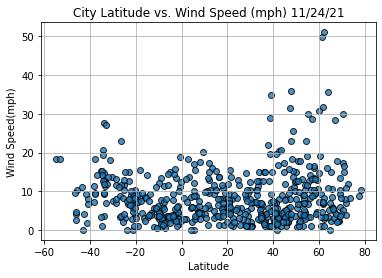

In [30]:
# scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()